# Set Parameter
- Attention = [None, Luong]
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 100
- N = 100
- Data Length = 10K
- Deduplication

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
character_accuracy = []
sentance_accuracy = []

In [4]:
train_path = "data/bracket_dedup/N100/data_train.txt"
dev_path = "data/bracket_dedup/N100/data_test.txt"

src = fields.SourceField()
tgt = fields.TargetField()
max_len = 104
def len_filter(example):
    return len(example.src) <= max_len and len(example.tgt) <= max_len
train = torchtext.data.TabularDataset(
    path=train_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
dev = torchtext.data.TabularDataset(
    path=dev_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
src.build_vocab(train)
tgt.build_vocab(train)
input_vocab = src.vocab
output_vocab = tgt.vocab

weight = torch.ones(len(tgt.vocab))
pad = tgt.vocab.stoi[tgt.pad_token]
loss = Perplexity(weight, pad)
if torch.cuda.is_available():
    loss.cuda()
    
optimizer = "Adam"
hidden_size = 50
bidirectional = True

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


# Prepare dataset

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-03-24 23:47:49,694 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


None Att


2019-03-24 23:48:07,934 INFO   Finished epoch 1: Train loss: 21.7049, Dev loss: 17.1144, Accuracy(Character): 0.0996, Accuracy(Word): 0.0000
2019-03-24 23:48:25,829 INFO   Finished epoch 2: Train loss: 16.5627, Dev loss: 16.9992, Accuracy(Character): 0.0950, Accuracy(Word): 0.0000
2019-03-24 23:48:43,902 INFO   Finished epoch 3: Train loss: 15.4323, Dev loss: 22.8473, Accuracy(Character): 0.1552, Accuracy(Word): 0.0000
2019-03-24 23:49:02,147 INFO   Finished epoch 4: Train loss: 15.7086, Dev loss: 15.5903, Accuracy(Character): 0.1839, Accuracy(Word): 0.0000
2019-03-24 23:49:19,636 INFO   Finished epoch 5: Train loss: 11.2796, Dev loss: 39.1008, Accuracy(Character): 0.1610, Accuracy(Word): 0.0000
2019-03-24 23:49:37,740 INFO   Finished epoch 6: Train loss: 12.7359, Dev loss: 15.0025, Accuracy(Character): 0.1848, Accuracy(Word): 0.0000
2019-03-24 23:49:55,693 INFO   Finished epoch 7: Train loss: 9.6682, Dev loss: 12.7017, Accuracy(Character): 0.2083, Accuracy(Word): 0.0000
2019-03-24 23:

2019-03-25 00:05:56,371 INFO   Finished epoch 60: Train loss: 2.4180, Dev loss: 3.0595, Accuracy(Character): 0.5226, Accuracy(Word): 0.1130
2019-03-25 00:06:14,463 INFO   Finished epoch 61: Train loss: 2.5774, Dev loss: 3.7762, Accuracy(Character): 0.4785, Accuracy(Word): 0.1264
2019-03-25 00:06:32,828 INFO   Finished epoch 62: Train loss: 2.7396, Dev loss: 4.4185, Accuracy(Character): 0.4651, Accuracy(Word): 0.1254
2019-03-25 00:06:50,850 INFO   Finished epoch 63: Train loss: 2.7237, Dev loss: 3.7628, Accuracy(Character): 0.5055, Accuracy(Word): 0.1264
2019-03-25 00:07:09,531 INFO   Finished epoch 64: Train loss: 2.8585, Dev loss: 6.3477, Accuracy(Character): 0.4421, Accuracy(Word): 0.1298
2019-03-25 00:07:27,872 INFO   Finished epoch 65: Train loss: 2.7503, Dev loss: 3.8758, Accuracy(Character): 0.4880, Accuracy(Word): 0.1293
2019-03-25 00:07:46,662 INFO   Finished epoch 66: Train loss: 2.9424, Dev loss: 6.2500, Accuracy(Character): 0.4102, Accuracy(Word): 0.1256
2019-03-25 00:08:04,

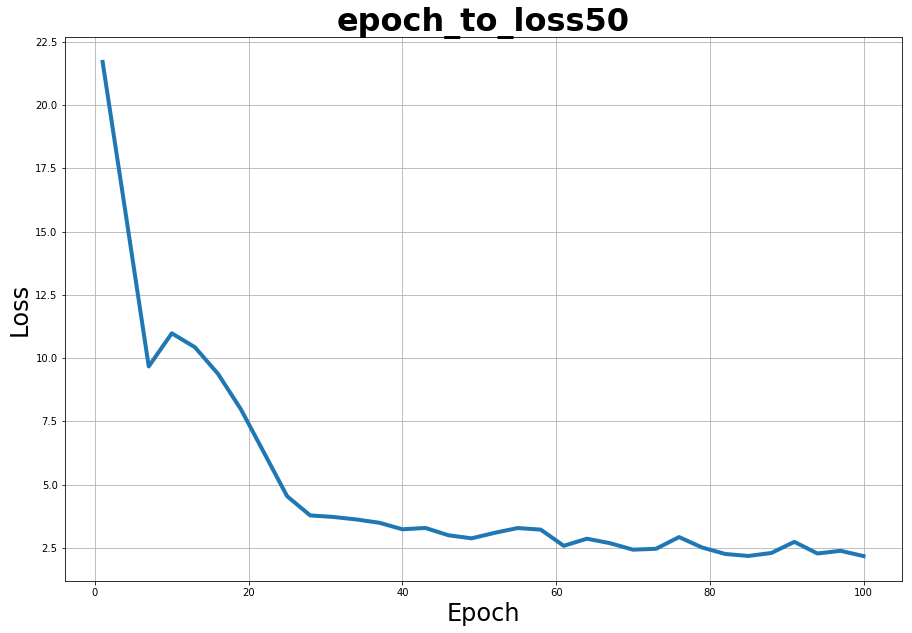

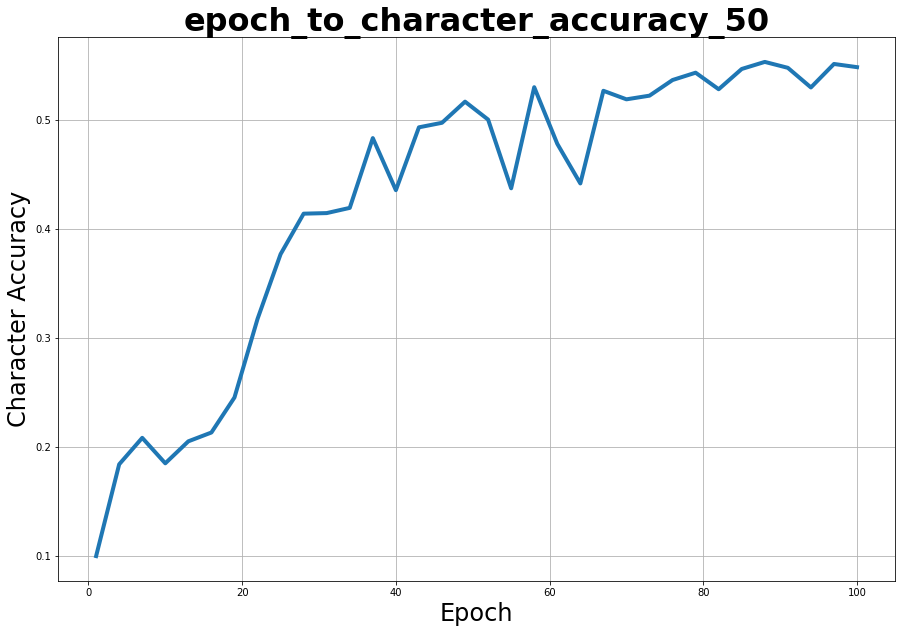

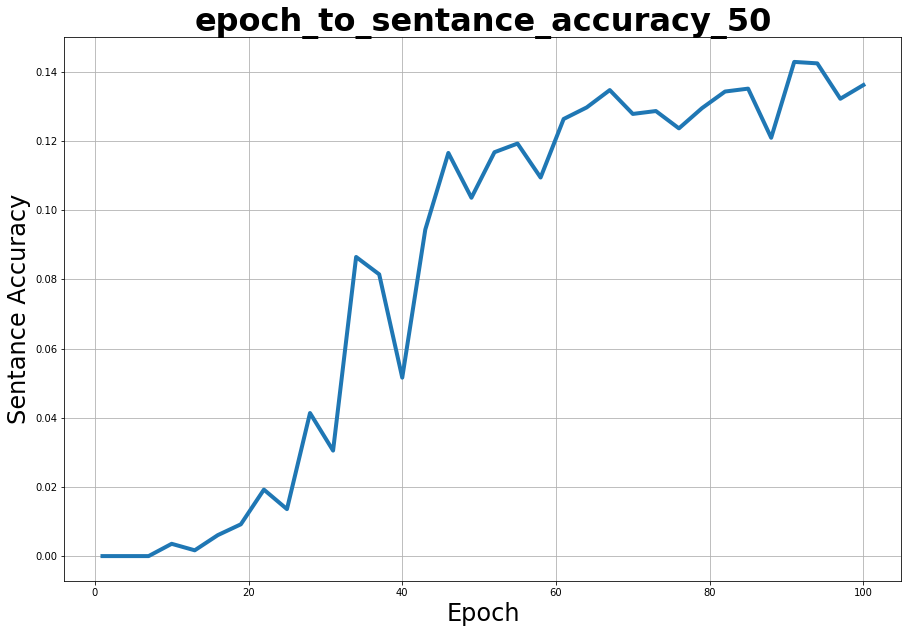

In [5]:
print("None Att")

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                    bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                     dropout_p=0.2, use_attention=None, bidirectional=bidirectional,
                     eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer(loss=loss, batch_size=32,
                      checkpoint_every=50,
                      print_every=100,
                      hidden_size=hidden_size,
                      path="test/None_att")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)

torch.save(seq2seq.state_dict(), 'log/pth/test.pth')

2019-03-25 00:18:01,415 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


Luong Att


/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-03-25 00:18:24,939 INFO   Finished epoch 1: Train loss: 21.2142, Dev loss: 17.0184, Accuracy(Character): 0.0984, Accuracy(Word): 0.0000
2019-03-25 00:18:48,683 INFO   Finished epoch 2: Train loss: 16.5573, Dev loss: 16.0116, Accuracy(Character): 0.1241, Accuracy(Word): 0.0000
2019-03-25 00:19:11,864 INFO   Finished epoch 3: Train loss: 15.0962, Dev loss: 63.3995, Accuracy(Character): 0.0972, Accuracy(Word): 0.0000
2019-03-25 00:19:35,208 INFO   Finished epoch 4: Train loss: 15.8369, Dev loss: 15.3137, Accuracy(Character): 0.1481, Accuracy(Word): 0.0023
2019-03-25 00:19:58,334 INFO   Finished epoch 5: Train loss: 12.9842, Dev loss: 9.4266, Accuracy(Character): 0.2099, Accuracy(Word): 0.0000
2019-03-25 00:20:21,188 INFO   Finished epoch 6: Train loss: 

2019-03-25 00:40:13,383 INFO   Finished epoch 58: Train loss: 1.7340, Dev loss: 2.1297, Accuracy(Character): 0.7026, Accuracy(Word): 0.1761
2019-03-25 00:40:37,585 INFO   Finished epoch 59: Train loss: 1.7411, Dev loss: 1.9340, Accuracy(Character): 0.7426, Accuracy(Word): 0.2025
2019-03-25 00:41:01,339 INFO   Finished epoch 60: Train loss: 1.6371, Dev loss: 1.7474, Accuracy(Character): 0.7504, Accuracy(Word): 0.2123
2019-03-25 00:41:25,151 INFO   Finished epoch 61: Train loss: 1.7185, Dev loss: 2.0858, Accuracy(Character): 0.7276, Accuracy(Word): 0.1692
2019-03-25 00:41:48,030 INFO   Finished epoch 62: Train loss: 1.6125, Dev loss: 1.7391, Accuracy(Character): 0.7573, Accuracy(Word): 0.2029
2019-03-25 00:42:10,294 INFO   Finished epoch 63: Train loss: 1.6073, Dev loss: 1.7925, Accuracy(Character): 0.7535, Accuracy(Word): 0.1697
2019-03-25 00:42:34,064 INFO   Finished epoch 64: Train loss: 1.6531, Dev loss: 2.1289, Accuracy(Character): 0.6815, Accuracy(Word): 0.2131
2019-03-25 00:42:57,

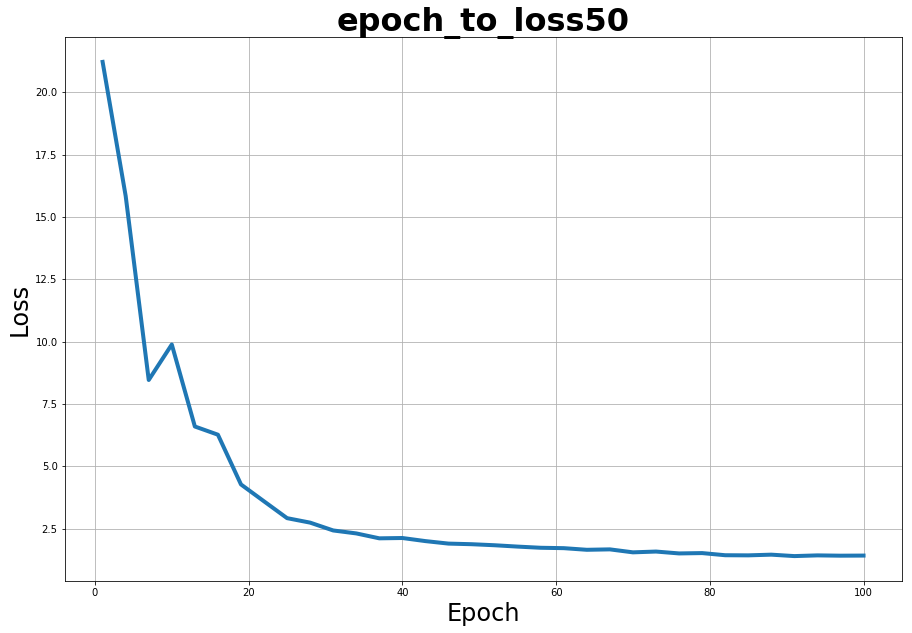

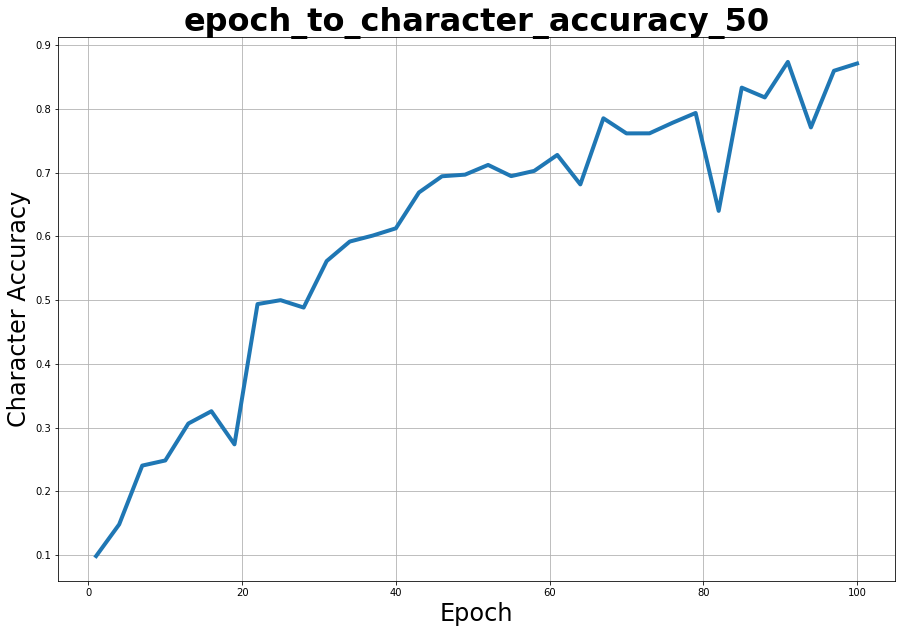

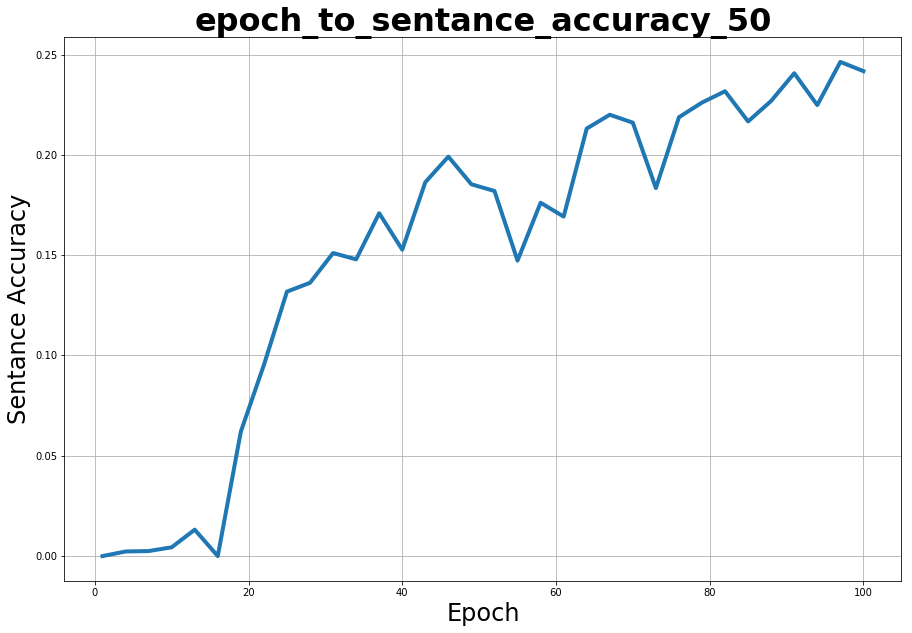

In [6]:
print("Luong Att")

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                    bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                     dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                     eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer(loss=loss, batch_size=32,
                      checkpoint_every=50,
                      print_every=100,
                      hidden_size=hidden_size,
                      path="test/Luong_att")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)

torch.save(seq2seq.state_dict(), 'log/pth/test.pth')

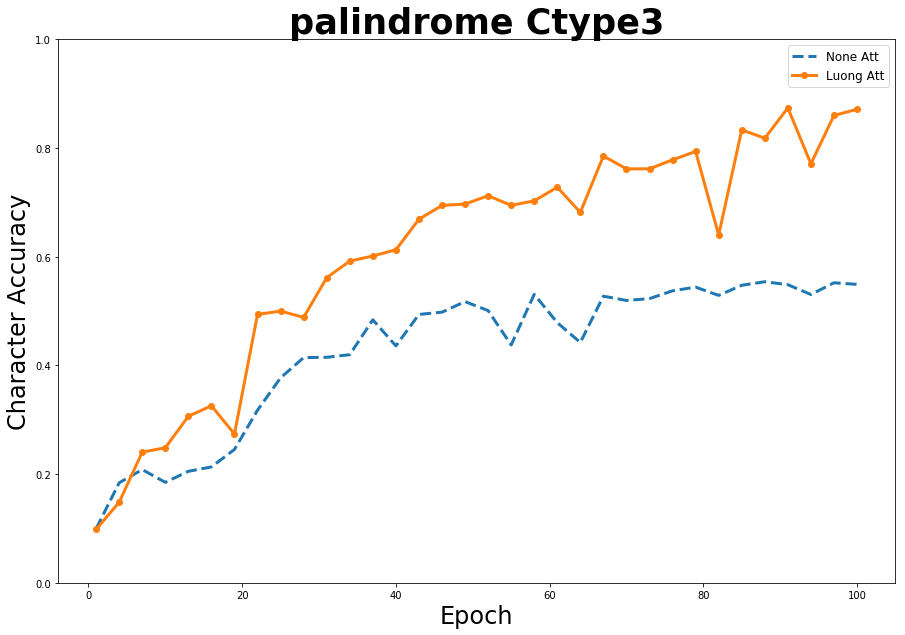

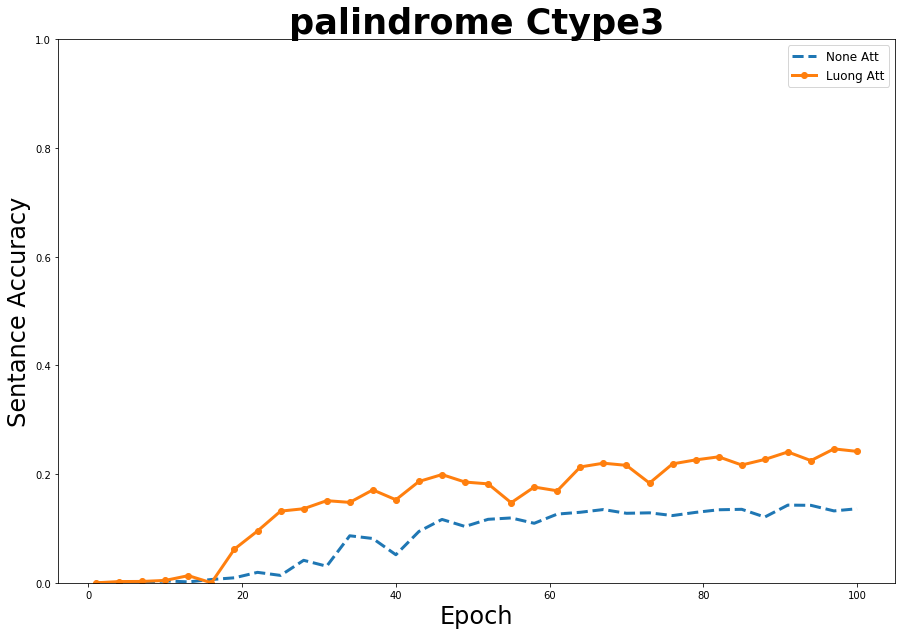

In [7]:
epochs = list(range(1, 101, 1))
plt.figure(figsize=(15,10))
plt.plot(epochs[::3], character_accuracy[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], character_accuracy[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Character Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('palindrome Ctype3', fontsize=35, fontweight=560)
plt.savefig('log/plot/test/epoch_to_character_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], sentance_accuracy[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], sentance_accuracy[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentance Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('palindrome Ctype3', fontsize=35, fontweight=560)
plt.savefig('log/plot/test/epoch_to_sentance_accuracy.png')

In [8]:
print(character_accuracy[0])
print(character_accuracy[1])

[0.09956728405179478, 0.09504343550237666, 0.15520078675626947, 0.1839239468939518, 0.16102278315030322, 0.18479593509260778, 0.2082543845271267, 0.21081789870513032, 0.1904048516636617, 0.1848516636616948, 0.15178823143746928, 0.19108998524831994, 0.20506474348467466, 0.21590558924766431, 0.20090804786100638, 0.21316177675790854, 0.2279986887395509, 0.285382724143583, 0.24534666448123257, 0.2511227667595476, 0.24058351089985247, 0.3175446648090477, 0.26086215374528765, 0.3710506474348467, 0.3770824455007376, 0.3832617603671529, 0.394968038026553, 0.41430585149975413, 0.4080478610063924, 0.36816915259793476, 0.41483691198164235, 0.4277823307654483, 0.40284871332568434, 0.4196262907720046, 0.42031798065890835, 0.45123750204884444, 0.483766595640059, 0.4298115063104409, 0.43879364038682184, 0.43590231109654154, 0.5115718734633666, 0.45123422389772166, 0.49367316833306013, 0.39509916407146367, 0.5108441239141125, 0.49783969841009673, 0.3889722996230126, 0.42843796099000164, 0.517259465661

In [9]:
print(sentance_accuracy[0])
print(sentance_accuracy[1])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004178854993731718, 0.0035520267446719597, 0.001671541997492687, 0.001671541997492687, 0.001671541997492687, 0.0025073129962390303, 0.008984538236523192, 0.00605933974091099, 0.011282908483075638, 0.013581278729628082, 0.00919348098620978, 0.020894274968658588, 0.002089427496865859, 0.0192227329711659, 0.03092352695361471, 0.02632678646050982, 0.013581278729628082, 0.03447555369828667, 0.032177183451734225, 0.041370664437944, 0.039908065190137905, 0.07041370664437945, 0.030505641454241537, 0.051817801922273296, 0.0708315921437526, 0.08650229837024655, 0.09089009611366486, 0.08086084412870874, 0.0814876723777685, 0.08211450062682825, 0.09423318010865023, 0.05160885917258671, 0.10238194734642708, 0.09130798161303803, 0.09444212285833682, 0.09339740910990389, 0.10175511909736733, 0.11659005432511492, 0.09945674885081487, 0.09109903886335144, 0.10363560384454659, 0.11930631007104053, 0.10676974508984538, 0.1167989970748015, 0.11345591307981613, 0